<a href="https://colab.research.google.com/github/HasithaHja/Deep-learning-with-TensorFlow/blob/main/02_neural_network_classification_with_TensorFlow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create cirecles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check out labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now.. let's visualize

In [ ]:
import pandas as pd
circles = pd.DataFrame({'X0':X[:, 0], 'X1':X[:, 1], 'label':y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


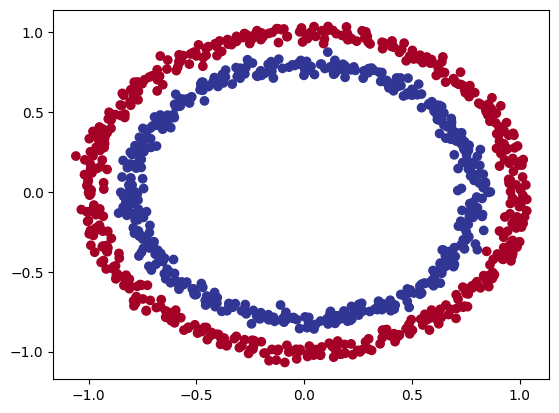

In [ ]:
# Visualize
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape, X.dtype, y.dtype

((1000, 2), (1000,), dtype('float64'), dtype('int64'))

## Steps in modeling

In [ ]:
import tensorflow as tf

# Set the random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 2s 5ms/step - loss: 5.4635 - accuracy: 0.4910
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 4.5167 - accuracy: 0.5080
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 1.7142 - accuracy: 0.4890
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7173 - accuracy: 0.4890
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7005 - accuracy: 0.4940


In [ ]:
# Let's try and improve our model by training for longer
model_1.fit(X, y, epochs=100, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 1s 6ms/step - loss: 0.6932 - accuracy: 0.5000


[0.693244993686676, 0.5]

Since we're working on binary classification problem and our model is getting around ~50% accuracy, it's performing as if it's guessing.

So let's step things up a notch and add an extra layer.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# Fit the model
model_2.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 2s 4ms/step - loss: 5.4860 - accuracy: 0.4630
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 4.7553 - accuracy: 0.4850
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 4.0605 - accuracy: 0.5150
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 4.8916 - accuracy: 0.5170
Epoch 5/5
32/32 [==============================] - 0s 7ms/step - loss: 7.7125 - accuracy: 0.5000


In [ ]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000


[7.7124762535095215, 0.5]

## Improving our model

Let's look into our bag of tricks to see hoew we can improve our model.

1. Create a model - we might to add more layers or increse the number of hidden units within a layer.
2. Compilinig a model - here we might to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1321 (5.16 KB)
Trainable params: 1321 (5.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6946 - accuracy: 0.5160


[0.6946121454238892, 0.515999972820282]

To visualize our models predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take a trained model, features (X) and labels (y)
* Create a meshgrid of different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [ ]:
import numpy as np

In [ ]:
def plot_decision_boundary(model, X, y):
  """
  Plot the decision boundary created by a model predicting on X.
  This function inspired by two resources:
  1. https://cs231n.github.io/
  2. https://github.com/GokuMohandas/Made-With-ML/blob/main
  """

  # Define the axis boundaries of the plot and create a meshgrid.
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multiclass
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get them ready to plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classification


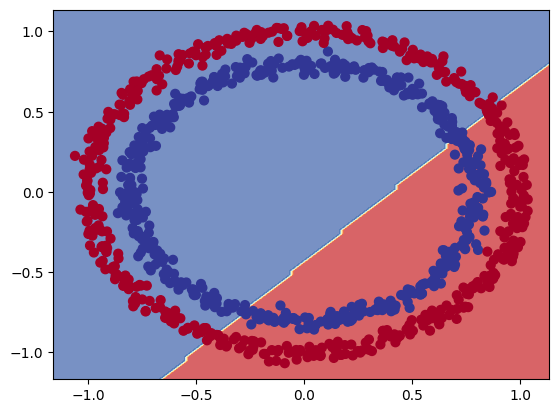

In [ ]:
# Check out the predictions our model making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [ ]:
 # Let's see if our model can be used in a regression problem
 tf.random.set_seed(42)

 # Create some regression data
 X_regression = tf.range(0, 1000, 5)
 y_regression = tf.range(100, 1100, 5) # y = x + 100

 # Split our regressin data into training and test sets
 X_reg_train = X_regression[:150]
 X_reg_test = X_regression[150:]
 y_reg_train = y_regression[:150]
 y_reg_test = y_regression[150:]

 # Fit the model into train data
 model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=int32)
      • training=True
      • mask=None


In [ ]:
X.shape, y.shape, X_reg_train.shape, y_reg_train.shape

((1000, 2), (1000,), TensorShape([150]), TensorShape([150]))

🤨 we created our model for a binary classification problem, but we're now working on a regression problem, let's change our model for suits our data

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_3_reg = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1]),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3_reg.compile(loss=tf.keras.losses.mae,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae"])

# Fit the model
model_3_reg.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 7ms/step - loss: 427.7312 - mae: 427.7312
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 330.2533 - mae: 330.2533
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 237.1824 - mae: 237.1824
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 140.9094 - mae: 140.9094
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 53.9576 - mae: 53.9576
Epoch 6/100
5/5 [==============================] - 0s 6ms/step - loss: 72.4404 - mae: 72.4404
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 74.8206 - mae: 74.8206
Epoch 8/100
5/5 [==============================] - 0s 6ms/step - loss: 51.1155 - mae: 51.1155
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 45.4078 - mae: 45.4078
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 47.7720 - mae: 47.7720
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 7ms/step


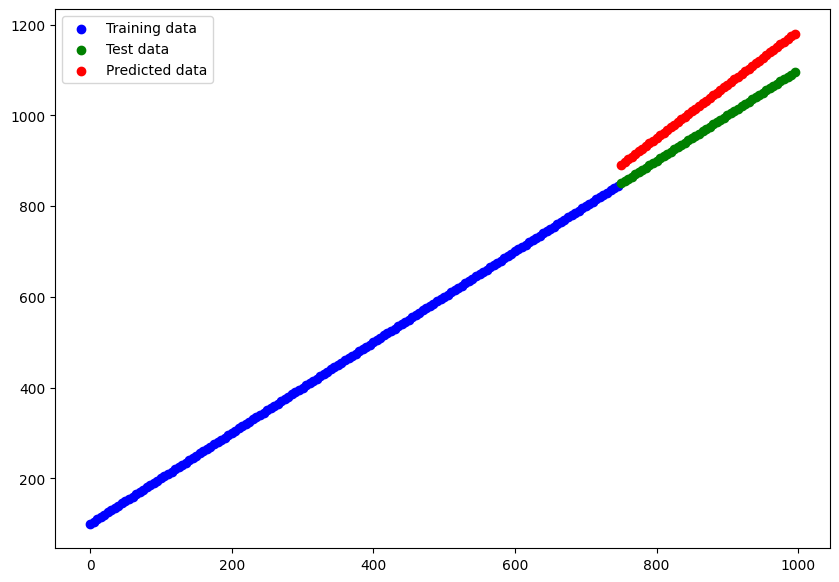

In [ ]:
# Make predictions with our trained model
y_reg_pred = model_3_reg.predict(X_reg_test)

# plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_pred, c="r", label="Predicted data")
plt.legend();


## The missing peace: Non-liniarity

In [ ]:
# Setting the random seed
tf.random.set_seed(42)

# Creating the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear")
])

# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit the model
history = model_4.fit(X, y, epochs=100, verbose=0)

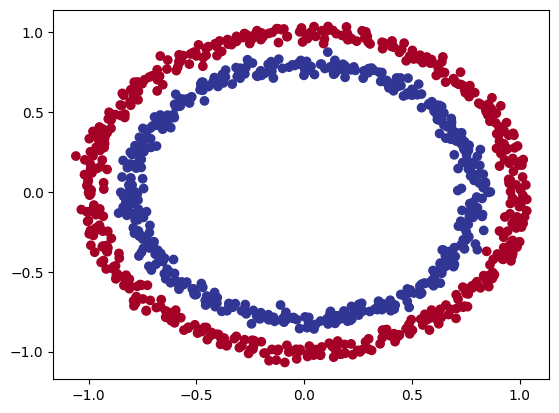

In [ ]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
doing binary classification


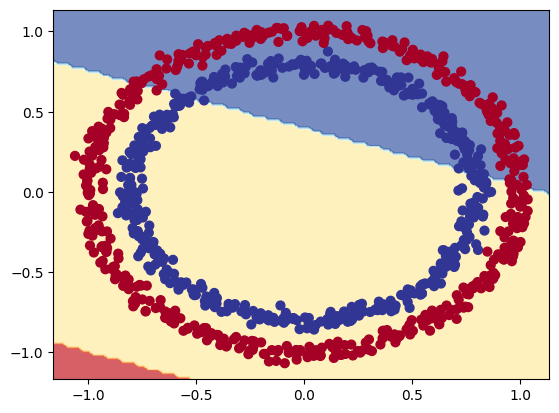

In [ ]:
# Plot the decision boundary
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

Let's try our first neural network with a non-linear activation function

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Creating the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu")
])

# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 5.6297 - accuracy: 0.4810
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 5.5589 - accuracy: 0.4810
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 5.4985 - accuracy: 0.4810
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 5.4297 - accuracy: 0.4780
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 5.3875 - accuracy: 0.4750
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 5.3769 - accuracy: 0.4740
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 5.3640 - accuracy: 0.4770
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 5.3511 - accuracy: 0.4770
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 5.3492 - accuracy: 0.4770
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 5.3401 - accuracy: 0.4770
Epoch 11/

In [ ]:
# Time to replicate the multi-layer neural network from TensorFlow playground

# Set the random seed
tf.random.set_seed(42)

# Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu")
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit the model
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.5803 - accuracy: 0.3930
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3668 - accuracy: 0.3870
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2079 - accuracy: 0.3790
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0964 - accuracy: 0.3710
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6681 - accuracy: 0.3710
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.0592 - accuracy: 0.3690
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 2.8368 - accuracy: 0.3660
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 2.5880 - accuracy: 0.3710
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 2.2738 - accuracy: 0.3620
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 1.7905 - accuracy: 0.3430
Epoch 11/

In [ ]:
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.3570


[0.6920340657234192, 0.3569999933242798]

313/313 [==============================] - 0s 1ms/step
doing multiclass classification


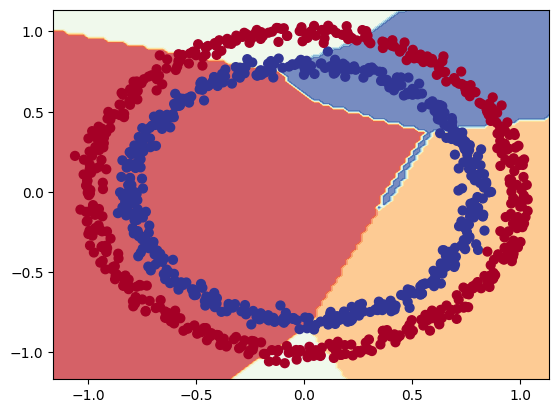

In [ ]:
# How our model predictions look like
plot_decision_boundary(model=model_6,
                       X=X,
                       y=y)

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"]
)

# Fit the model
history = model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.7016 - accuracy: 0.4970
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6981 - accuracy: 0.5010
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.4970
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4930
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4960
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.4800
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.4910
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6901 - accuracy: 0.4890
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5050
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5020
Epoch 11/

In [ ]:
# Evaluate model_7
model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2480 - accuracy: 0.9720


[0.2479916214942932, 0.972000002861023]

313/313 [==============================] - 0s 1ms/step
doing binary classification


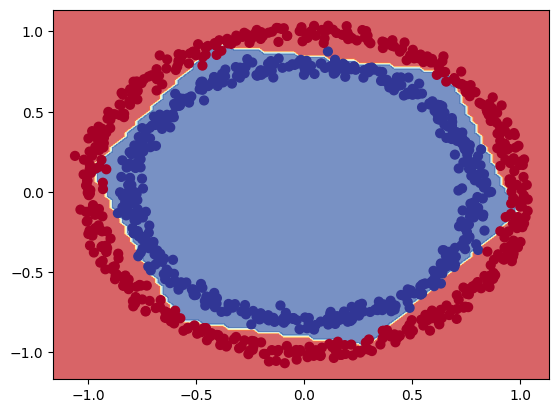

In [ ]:
plot_decision_boundary(model=model_7,
                       X=X,
                       y=y)


❓ **Question:** What's wrong the predictions we've made? Are we really evaluating our model correctly? Hint: what data did the odel learn onand what data did we predict on?

🔑 **Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Now we've discussed the concept of linear and non-linear functions (or lines), let's see them in action.

In [ ]:
# Let's create a toy tensor
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

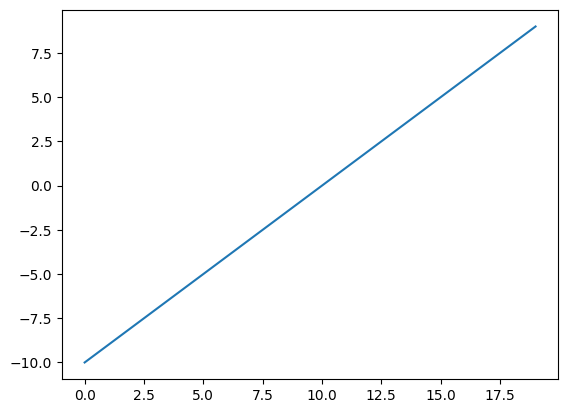

In [ ]:
# Plot the toy tensor
plt.plot(A);

In [ ]:
# Let's try to create a function for sigmoid - sigmoid(x) = 1/(1+exp(-1))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on the toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

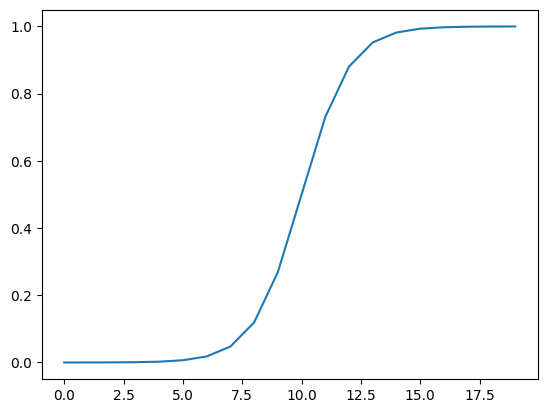

In [ ]:
# plot the sigmoid toy tensor
plt.plot(sigmoid(A));

In [ ]:
# Recreate the relu function
def relu(x):
  return tf.maximum(0, x)

# Pass our toy function to relu
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

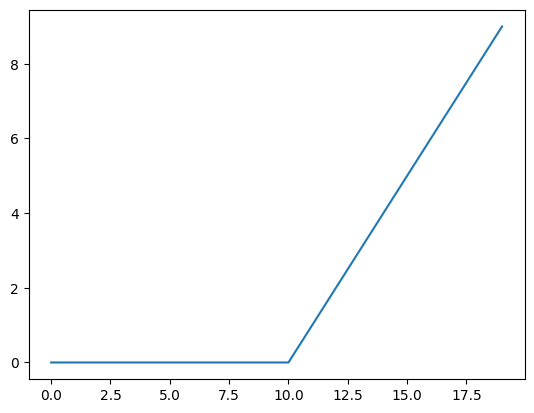

In [ ]:
# Plot the relu with toy tensor
plt.plot(relu(A));


📖 **Resource:** [More](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html) about activation functions.

## Evaluating and improving our classification

So far we've been trainig and testing on a same dataset.

However, in machine learning this is basically a sin.

So let's create training and test sets.

In [ ]:
# Check how many examples we have
len(X)

1000

In [ ]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = X[:800], X[800:], y[:800], y[800:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
# Let's recreate a model to fit on the training data and evaluate on the testing data

# Set random seed
tf.random.set_seed(42)

# Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# Fit the model
history = model_8.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6869 - accuracy: 0.5300
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6792 - accuracy: 0.5813
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6727 - accuracy: 0.5725
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6683 - accuracy: 0.5838
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6616 - accuracy: 0.6450
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6529 - accuracy: 0.5813
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6424 - accuracy: 0.6800
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6284 - accuracy: 0.6625
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6001 - accuracy: 0.7250
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5678 - accuracy: 0.7300
Epoch 11/

In [ ]:
# Evaluate the model_8
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0265 - accuracy: 0.9950


[0.026509087532758713, 0.9950000047683716]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


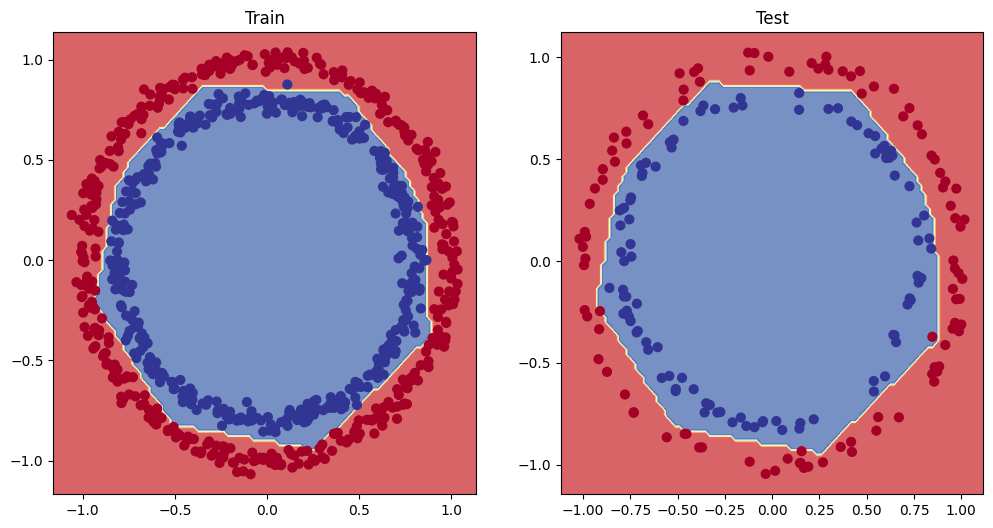

In [ ]:
# Plot the decision boundary for training and testing data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X_train, y_train);
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X_test, y_test);

## Plot the loss (training) curve

In [ ]:
# Getting the history to a dataframe
pd.DataFrame(history.history)

,loss,accuracy
0,0.686872,0.53000
1,0.679203,0.58125
2,0.672732,0.57250
3,0.668324,0.58375
4,0.661578,0.64500
...,...,...
95,0.016583,1.00000
96,0.016684,0.99875
97,0.016205,0.99750
98,0.014799,0.99750


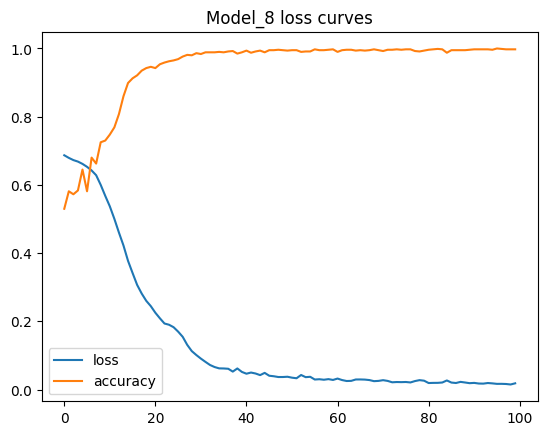

In [ ]:
# Plot the loss curve
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves");

🔑 **Note:** For many problems, the loss function going downmeans the model is improving (the predictions it's making are getting closer to the ground thruth labels).

## Finding the best learning rate

To find the ideal leraning rate ( the learning rate where the loss decreases most during training) we're going to use following steps:
* A learning rate **callback** - you can think of a callback as an ectra peace of functionality, you can add to your model *wehile* its training.
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curves plot.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Creating the model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_9.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])


Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7273 - accuracy: 0.5013 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7259 - accuracy: 0.4925 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7244 - accuracy: 0.4863 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7228 - accuracy: 0.5038 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7213 - accuracy: 0.4837 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7197 - accuracy: 0.4638 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7180 - accuracy: 0.4938 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7164 - accuracy: 0.4938 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

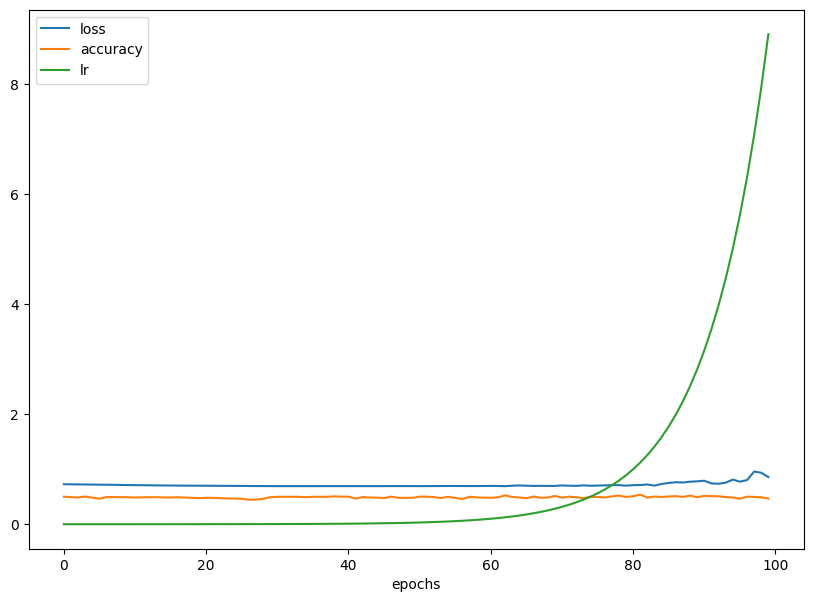

In [ ]:
# Checkout history_9
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs");

Text(0.5, 1.0, 'Learning Rate Vs. Loss')

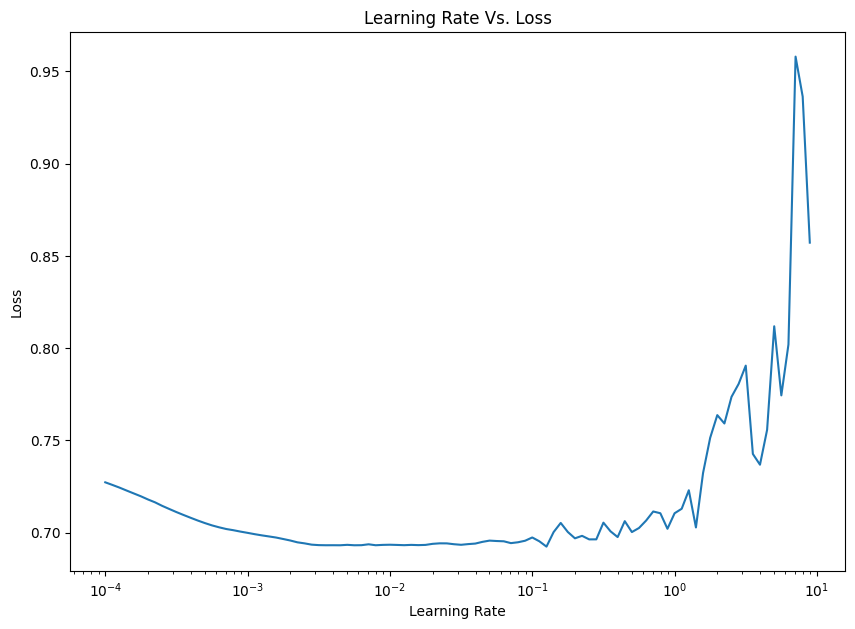

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate Vs. Loss")

In [ ]:
# Lets try a higher ideal learning rate from the graph, with the same model

# Set random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

# Fit the model
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 4ms/step - loss: 0.6793 - accuracy: 0.6137
Epoch 2/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6533 - accuracy: 0.6500
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6031 - accuracy: 0.7362
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5333 - accuracy: 0.8075
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4680 - accuracy: 0.8175
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3757 - accuracy: 0.9025
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3308 - accuracy: 0.8988
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2520 - accuracy: 0.9425
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1851 - accuracy: 0.9825
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1380 - accuracy: 0.9925
Epoch 11/20
25/25 [

In [ ]:
# Evaluate model_10 on the test data
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0448 - accuracy: 0.9900


[0.04480801522731781, 0.9900000095367432]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


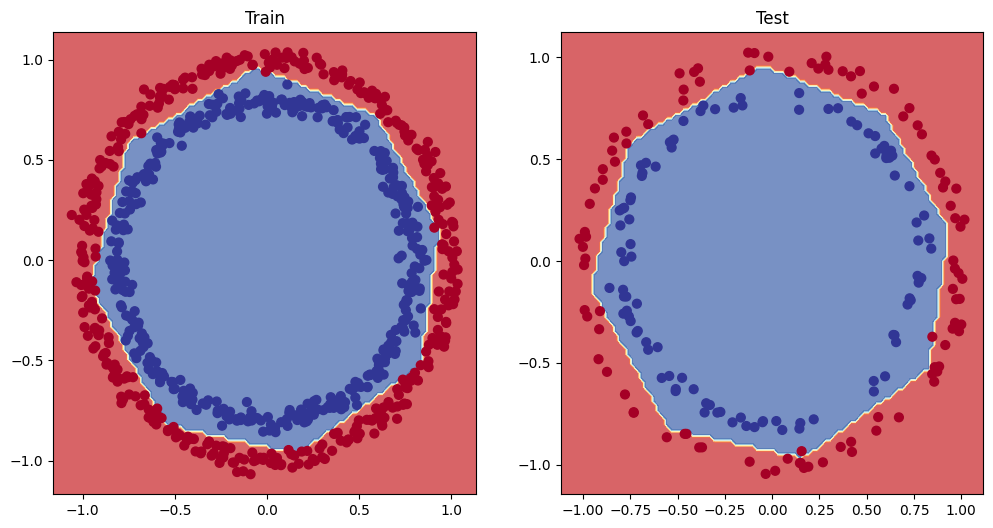

In [ ]:
# Plot the decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)

## More classification evaluation methods

Alongside visualizing our models results as much as possible, there are handfull of other classification evaluation methods & metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* Confusion metrix
* F1-score
* Classification report (from scikit-learn)

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions on model
y_pred = model_10.predict(X_test)

# Confusion matrix
confusion_matrix(y_test, y_pred)

7/7 [==============================] - 0s 2ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
y_pred[:10]

array([[0.9908517 ],
       [0.9985721 ],
       [0.99590963],
       [0.98894864],
       [0.02056357],
       [0.00345898],
       [0.996652  ],
       [0.00188099],
       [0.99497473],
       [0.00329838]], dtype=float32)

Our predictions comes out as **prediction probability** form which is the output from sigmoid or softamx activation functions.

In [ ]:
# Convert prediction probabilities to binary format
tf.round(y_pred)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
# Confusion matrics
confusion_matrix(y_test, tf.round(y_pred))

array([[99,  2],
       [ 0, 99]])

▶ **Note:** the confusion metrix we're about to write is a remix of scikit-learn's [plot_confusion_matrics](https://github.com/scikit-learn/scikit-learn/blob/baf828ca1/sklearn/metrics/_plot/confusion_matrix.py#L443)

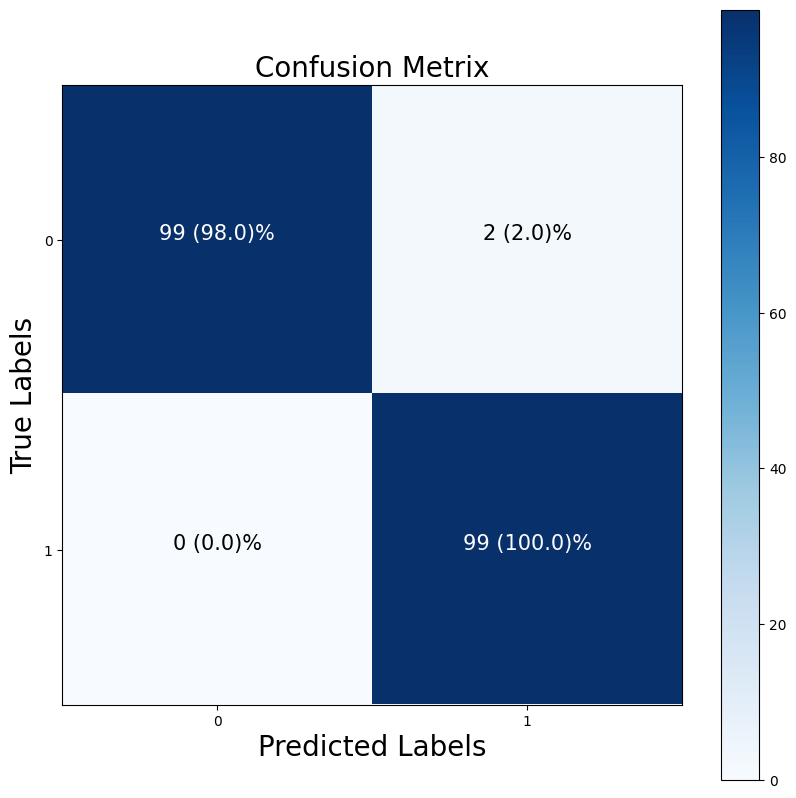

In [ ]:
import itertools

figsize = (10, 10)

# Create the confusion metrix
cm = confusion_matrix(y_test, tf.round(y_pred))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion metrix
n_classes = cm.shape[0]

# Prettifying
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label axes
ax.set(title="Confusion Metrix",
       xlabel="Predicted Labels",
       ylabel="True Labels",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colours
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f})%",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)



# Multiclass Classification

When you have more than two classesas an option, it's known as **multiclass-classification**.

To practice multiclass classification, we're going to build a neural network to classify different images ofdifferent items of clothing.

[Fashin_mnist](https://github.com/zalandoresearch/fashion-mnist) dataset

In [ ]:
 import tensorflow as tf
 from tensorflow.keras.datasets import fashion_mnist

 # The data has already been sorted into training and test sets for us.

 (train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(f"first train_data:\n{train_data[0]}\n")
print(f"first train_label:\n{train_labels[0]}\n")

first train_data:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [ ]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

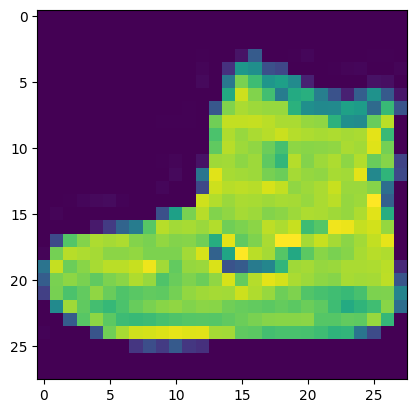

In [ ]:
# plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [ ]:
# Turning our labels to human readable format
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

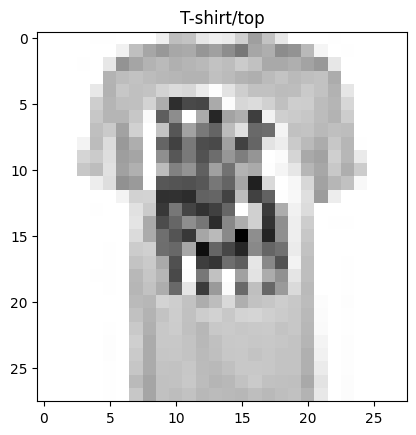

In [ ]:
# Plot an example image and its label
index = tf.random.uniform(shape=[],
                          maxval=len(train_data),
                          dtype=tf.int32)
plt.imshow(train_data[index], cmap=plt.cm.binary);
plt.title(class_names[train_labels[index]]);

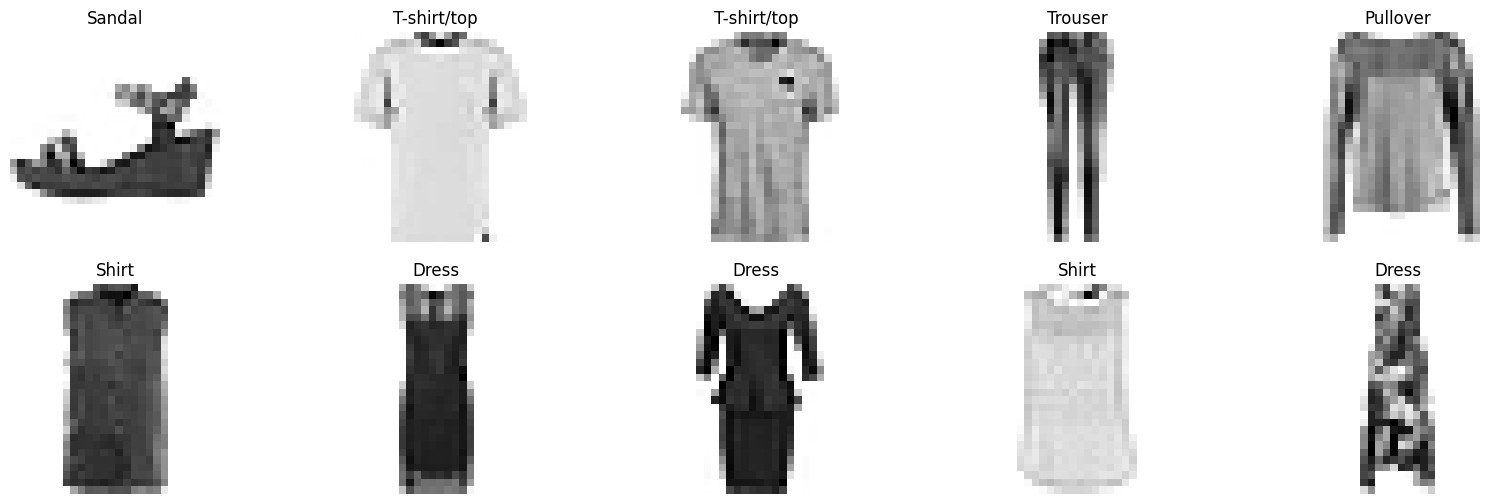

In [ ]:
# plot multiple images of fashion mnist
import random
plt.figure(figsize=(20, 6))
for i in range(10):
  ax = plt.subplot(2, 5, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building multiclass classification model

For our multiclass classification model, we can use a similar architectureto our binary classifires, however, we're going to have to tweak a few things:

* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
  * If your *labels are one-hot encoded*, use **CategoricalCrossentropy()**
  * If your *labels are in integer form*, use **SparseCategoricalCrossentropy()**
* Output layer activation = softmax (not sigmoid)

In [ ]:
# Our data shoul be flattened (from 28 x 28 to None, 784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

(None, 784)

In [ ]:
28 * 28

784

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Creating the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compiling the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fitting the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1549 - accuracy: 0.1637 - val_loss: 2.0576 - val_accuracy: 0.1861
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.0233 - accuracy: 0.1929 - val_loss: 1.8674 - val_accuracy: 0.2409
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7559 - accuracy: 0.2535 - val_loss: 1.7039 - val_accuracy: 0.2626
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6919 - accuracy: 0.2612 - val_loss: 1.6835 - val_accuracy: 0.2541
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6758 - accuracy: 0.2642 - val_loss: 1.6584 - val_accuracy: 0.2752
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6544 - accuracy: 0.2792 - val_loss: 1.6387 - val_accuracy: 0.2751
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.6438 - accuracy: 0.2895 - val_loss: 1.6397 - val_accuracy:

In [ ]:
# Check the model summary
model_11.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_25 (Dense)            (None, 4)                 3140      
                                                                 
 dense_26 (Dense)            (None, 4)                 20        
                                                                 
 dense_27 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Check the min and the max values of training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 & 1.

In [ ]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum value
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max vlues of scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
# Now our data is normalized, let's build a model to find patterns in it

# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer="Adam",
                 metrics=["accuracy"])

# Fit the model
history_12 = model_12.fit(train_data_norm,
                          train_labels,
                          epochs=10,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 1.2506 - accuracy: 0.5164 - val_loss: 0.8844 - val_accuracy: 0.6780
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7970 - accuracy: 0.7014 - val_loss: 0.7730 - val_accuracy: 0.7026
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7258 - accuracy: 0.7167 - val_loss: 0.7258 - val_accuracy: 0.7199
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6888 - accuracy: 0.7279 - val_loss: 0.6933 - val_accuracy: 0.7281
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6635 - accuracy: 0.7427 - val_loss: 0.6949 - val_accuracy: 0.7271
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6435 - accuracy: 0.7524 - val_loss: 0.6793 - val_accuracy: 0.7357
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6312 - accuracy: 0.7581 - val_loss: 0.6525 - val_accuracy:

> 🔑 **Note:** Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 & 1).

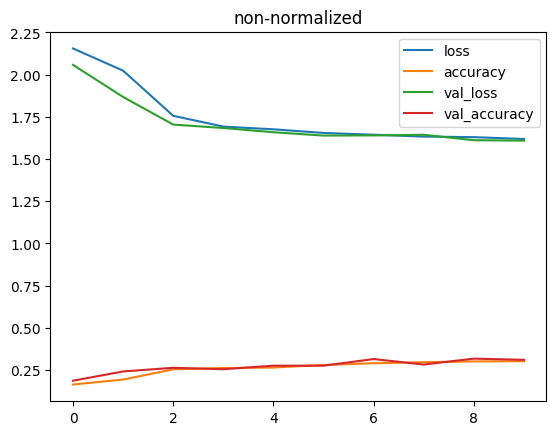

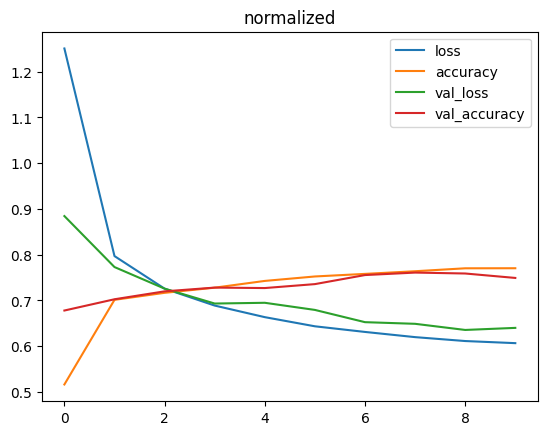

In [ ]:
import pandas as pd

# Plotting non-normalized model's loss curve
pd.DataFrame(non_norm_history.history).plot(title="non-normalized");
# Plotting normalized model;s loss curve
pd.DataFrame(history_12.history).plot(title="normalized");

plt.show()

> 🔑 **Note:** The same model with even *slightly* different data can be produce *dramatically* different results. So, when you're comparing models, it's important to make sure you're comparing them on the same criteria (e. . same architecture but different data or same data but different architecture).

##Finding thre ideal learning rate


In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create thr model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Setting the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
history_13 = model_13.fit(train_data_norm,
                          train_labels,
                          epochs=40,
                          validation_data=(test_data_norm, test_labels),
                          callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 8s 3ms/step - loss: 1.2177 - accuracy: 0.5356 - val_loss: 0.9442 - val_accuracy: 0.6271 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7769 - accuracy: 0.7224 - val_loss: 0.7035 - val_accuracy: 0.7477 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6530 - accuracy: 0.7576 - val_loss: 0.6731 - val_accuracy: 0.7418 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6186 - accuracy: 0.7689 - val_loss: 0.6417 - val_accuracy: 0.7592 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6041 - accuracy: 0.7728 - val_loss: 0.6383 - val_accuracy: 0.7646 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5912 - accuracy: 0.7775 - val_loss: 0.6312 - val_accuracy: 0.7582 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

Text(0.5, 1.0, 'Finding the ideal learning rate')

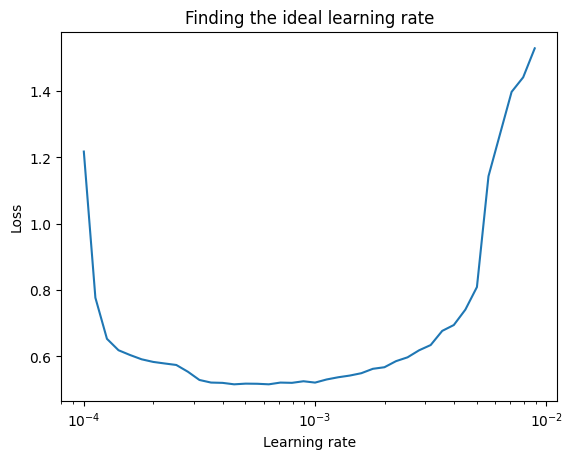

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-4 * (10**(tf.range(40)/20))
plt.semilogx(lrs, history_13.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [ ]:
# Creating a model with 0.001 learning rate

# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

# Fit the model
model_14.fit(train_data_norm,
             train_labels,
             epochs=20,
             validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 13s 6ms/step - loss: 1.1323 - accuracy: 0.5792 - val_loss: 0.7808 - val_accuracy: 0.7018
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7171 - accuracy: 0.7364 - val_loss: 0.7145 - val_accuracy: 0.7301
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6595 - accuracy: 0.7601 - val_loss: 0.6610 - val_accuracy: 0.7626
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6343 - accuracy: 0.7711 - val_loss: 0.6614 - val_accuracy: 0.7586
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6193 - accuracy: 0.7767 - val_loss: 0.6325 - val_accuracy: 0.7743
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6073 - accuracy: 0.7830 - val_loss: 0.6387 - val_accuracy: 0.7715
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5995 - accuracy: 0.7862 - val_loss: 0.6168 - val_accuracy

## Evaluating our multi-class classification model

To evaluate our multi-class classification modelwe could:
* Evaluate it's performance using other classification metrics (such as a confusion matrix)
* Assess some of it's predictions (through visualization)
* Improve it's results (by training it for longer or changing the architecture)
* Save and export it for use in an applicaion

Let's go through the top 2...


In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):

  # Create the confusion metrix
  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion metrix
  n_classes = cm.shape[0]

  # Prettifying
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label axes
  ax.set(title="Confusion Metrix",
        xlabel="Predicted Labels",
        ylabel="True Labels",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colours
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f})%",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)



In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm) # probs is short for "prediction probabilities"

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 2s 5ms/step


array([[1.89053958e-06, 6.85072441e-13, 2.82953661e-10, 5.69478652e-06,
        1.10452510e-19, 4.32352901e-01, 2.36430054e-07, 3.56790088e-02,
        4.57203132e-05, 5.31914473e-01],
       [1.15979963e-03, 2.83593108e-05, 3.00726384e-01, 9.92167857e-04,
        5.74755251e-01, 5.82932991e-08, 1.21515945e-01, 5.25762187e-22,
        8.22001603e-04, 2.74549585e-14],
       [6.40455312e-07, 9.96453822e-01, 4.26209270e-04, 3.11453012e-03,
        4.59660487e-06, 2.12471533e-12, 1.70874344e-07, 9.72825553e-12,
        1.22440090e-13, 9.44094520e-13],
       [1.06640549e-07, 9.98315871e-01, 1.39706535e-04, 1.54294271e-03,
        1.30441799e-06, 5.03396661e-14, 2.44710421e-08, 3.65468777e-13,
        2.34200184e-15, 4.82423109e-14],
       [1.98150128e-01, 7.57704129e-06, 4.19787504e-02, 3.90128307e-02,
        7.35454932e-02, 9.61241858e-06, 6.34772599e-01, 3.18801958e-14,
        1.25228530e-02, 1.41105957e-07]], dtype=float32)

> 🔑 **Note:** Remember to make predictions on the same kind of data your model was trained on (e.g. if your model was trained on normalized data, you'll want to make predictions on normalized data)

In [ ]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([1.8905396e-06, 6.8507244e-13, 2.8295366e-10, 5.6947865e-06,
        1.1045251e-19, 4.3235290e-01, 2.3643005e-07, 3.5679009e-02,
        4.5720313e-05, 5.3191447e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 4, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
test_labels[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[686,   2,  26, 114,   3,   1, 144,   0,  22,   2],
       [  2, 944,  16,  34,   2,   0,   1,   0,   1,   0],
       [ 13,   6, 610,  20, 246,   0,  97,   0,   8,   0],
       [ 35,  16,  31, 830,  25,   2,  58,   0,   3,   0],
       [  0,   2, 125,  31, 743,   0,  87,   0,  12,   0],
       [  1,   0,   0,   1,   0, 907,   1,  52,   9,  29],
       [116,   0, 124,  69, 177,   0, 484,   1,  28,   1],
       [  0,   0,   0,   0,   0,  52,   0, 900,   0,  48],
       [ 11,   0,  10,   4,   6,  16,  34,   4, 915,   0],
       [  3,   0,   0,   0,   0,  31,   0,  35,   4, 927]])

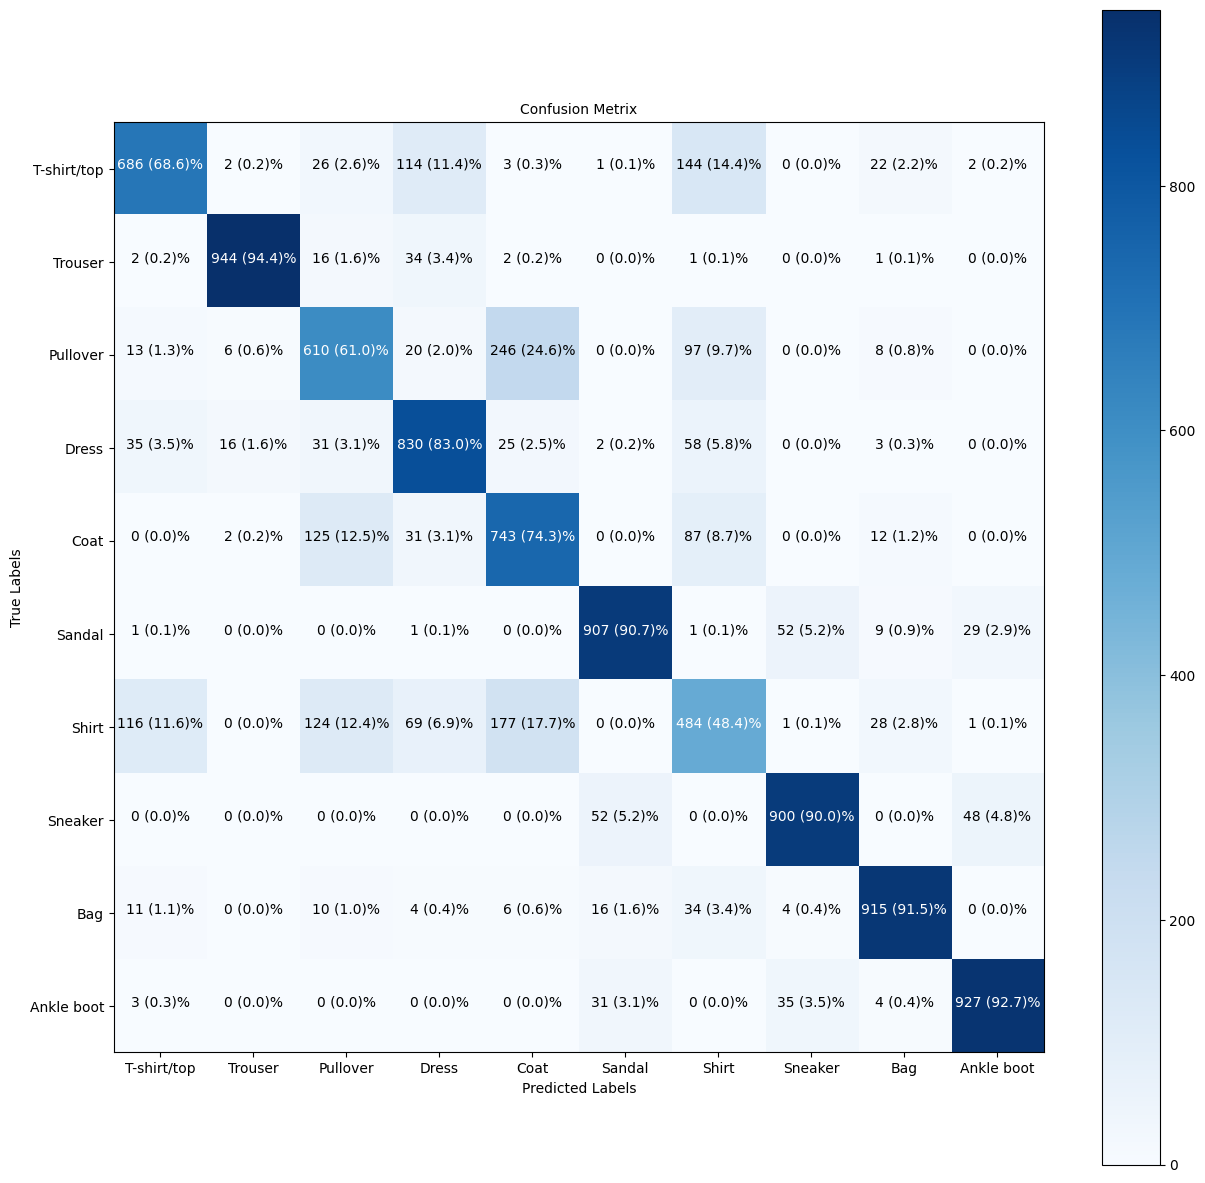

In [ ]:
# A prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      text_size=10,
                      figsize=(15, 15))

> 🔑 **Note:** Often when working with images and other form of visual data, it's good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your model.

How about we create a litte function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & the predicted label

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """

  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label, 100*tf.reduce_max(pred_probs), true_label),
             color=color) # Set the color to green or red based on if prediction right or wrong

1/1 [==============================] - 0s 22ms/step


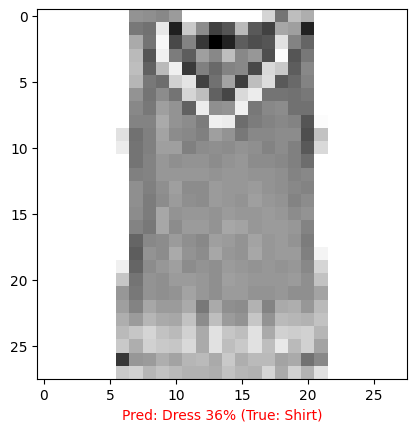

In [ ]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

## What patterns are our model learning?

In [ ]:
# Find the layers of our model
model_14.layers

In [ ]:
# Take a single layer
model_14.layers[1]

In [ ]:
# Get the patterns in a layer
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.47922328,  0.72581404, -0.8060924 , -0.07584937],
        [ 0.93992263,  0.6546806 , -1.2097815 ,  0.01130527],
        [-0.0359198 ,  1.1716273 , -0.96546733, -0.07661693],
        ...,
        [-0.35736752,  0.06461487, -0.6038629 ,  0.0484329 ],
        [-0.53453207, -0.46059328, -0.4428209 ,  0.04128814],
        [-0.4895817 ,  0.5333017 , -0.17249824,  0.08512725]],
       dtype=float32),
 (784, 4))

In [ ]:
weights[0, 0]

0.47922328

In [ ]:
# bias and biases shapes
biases, biases.shape

(array([ 0.91978407,  1.3004847 ,  1.0339237 , -0.02394509], dtype=float32),
 (4,))

▶ A weight matrix have one value per datapoint (shape=(784, 4)), A bias matrix has only one value per hidden unit.

▶ Every neuron has a bias vector. Each of these are paired with a weight matrix.

▶ The bias vector gets initialized as zeros (at least in the case of TensorFlow Dense layer).

▶ The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [ ]:
model_14.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 784)               0         
                                                                 
 dense_64 (Dense)            (None, 4)                 3140      
                                                                 
 dense_65 (Dense)            (None, 4)                 20        
                                                                 
 dense_66 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


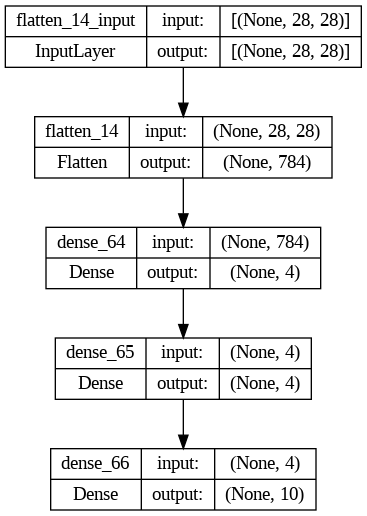

In [ ]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)